# Multiple Linear Regression I

Simple linear regression predicts a response using a single predictor variable. However, in practice, we often have multiple predictors. For example, in the Advertising data, we only considered the impact of TV on sales. But it would be naive to assume that is the only factor. Other predictors like radio and newspaper advertising could also play a role. To extend our analysis, we can consider a multiple regression model:

$$
\text{sales} = \beta_0 + \beta_1 \times \text{TV} + \beta_2 \times \text{radio} + \beta_3 \times \text{newspaper} + \epsilon.
$$

In a more general setting, given a dataset of the form $\{(X_1, X_2,\cdots, X_n, y)_{i}: i = 1, 2, \cdots, p\}$, a multiple regression model has the following form:

$$
y = \beta_0 + \beta_1 X_1 + \cdots + \beta_n X_n + \epsilon
$$

where $X_i$ represents the ith predictor and $\beta_i$ is the average effect on Y of a one unit increase in Xj, assuming all other predictors are fixed--so the larger the value of $\beta_i$, the more impactful $y$ is.

## Estimating the Regression Coefficients

The coefficients $\beta_0, \beta_1, \ldots, \beta_p$ are unknown and need to be estimated. As before, using the least squares method, we are looking for $\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_p$ that minimize the sum of squared differences between the observed and predicted values:

$$
\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where
$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \cdots + \hat{\beta}_p x_p.
$$

If you'd like to visualize it, we are looking for a hyperplane that is collectively closer to the data points:


__Group Activity__ Which one of the following planes describe the generated data better?

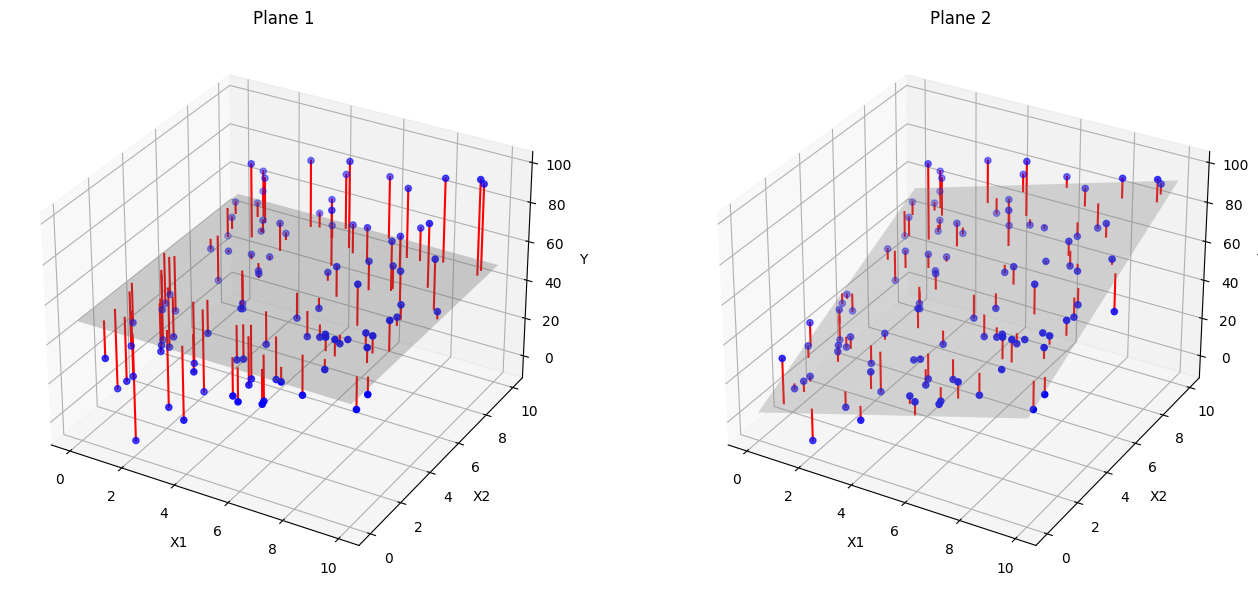

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generate random data
np.random.seed(42)
X1 = np.random.rand(100) * 10
X2 = np.random.rand(100) * 10
Y = 3 + 4 * X1 + 5 * X2 + np.random.randn(100) * 10

# Create a grid of X1, X2 values
X1_grid, X2_grid = np.meshgrid(np.linspace(0, 10, 10), np.linspace(0, 10, 10))

# Y values for the grid
Y_grid = 3 + 4 * X1_grid + 5 * X2_grid

# Plot the data points and a constant plane
fig = plt.figure(figsize=(14, 6))

# Plot the data points
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X1, X2, Y, color='blue', label='Data points')

# Plot a plane where y = 50
ax1.plot_surface(X1_grid, X2_grid, np.full_like(X1_grid, 50), alpha=0.3, color='gray', label='Y = 40')

# Add lines from data points to the plane y = 50
for i in range(len(X1)):
    x1, x2, y = X1[i], X2[i], Y[i]
    ax1.plot([x1, x1], [x2, x2], [y, 50], color='red', linestyle='-')

# Labels and title for the plane y = 50
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')
ax1.set_title('Plane 1')

# Plot the true relationship and projection lines
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X1, X2, Y, color='blue', label='Data points')
ax2.plot_surface(X1_grid, X2_grid, Y_grid, alpha=0.3, color='gray')

# Add lines from data points to the regression plane
for i in range(len(X1)):
    x1, x2, y = X1[i], X2[i], Y[i]
    y_pred = 3 + 4 * x1 + 5 * x2  # Predict Y using the true regression formula
    ax2.plot([x1, x1], [x2, x2], [y, y_pred], color='red', linestyle='-')

# Labels and title for the regression plane
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Y')
ax2.set_title('Plane 2')

plt.tight_layout()
plt.show()


## Implementing Multiple Regression

Implementing multiple regression is similar to simple linear regression, but instead of a single input value, you use multiple input variables. Let’s look at an example.

__Group Activity__
Plot the regression plane for the generated dataset above. Compare this plot to the previously shown planes.

In [64]:
#Step 1:
##Prepare data for regression using sklearn
## we need to create a vector of all predictors: $ X = [X_1, X_2]$
X = np.column_stack((X1, X2))



In [65]:
# Step 2: Create a linear regression model and fit the model

## Create a linear regression model
model = LinearRegression()

## Fit the model to the data
model.fit(X, Y)

LinearRegression()

In [66]:
# Get the coefficients and intercept
b0 = model.intercept_
b1, b2 = model.coef_

print(f"Intercept (b0): {b0}")
print(f"Coefficient for X1 (b1): {b1}")
print(f"Coefficient for X2 (b2): {b2}")

Intercept (b0): 2.1061003645007332
Coefficient for X1 (b1): 3.658274678972615
Coefficient for X2 (b2): 5.719311410100673


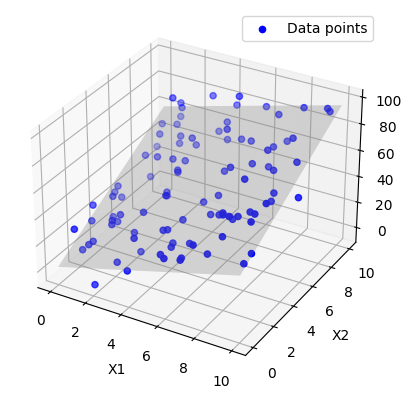

In [67]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Add a single axes object

# Plot the data points
ax.scatter(X1, X2, Y, color='blue', label='Data points')

# Plot the regression plane
## Create a grid of X1, X2 values
X1_grid, X2_grid = np.meshgrid(np.linspace(0, 10, 10), np.linspace(0, 10, 10))
## Predict Y values for the grid
Y_grid_regression = b0 + b1 * X1_grid + b2 * X2_grid
## Plot the regression plane
ax.plot_surface(X1_grid, X2_grid, Y_grid_regression, alpha=0.3, color='gray')

# Labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()

plt.show()


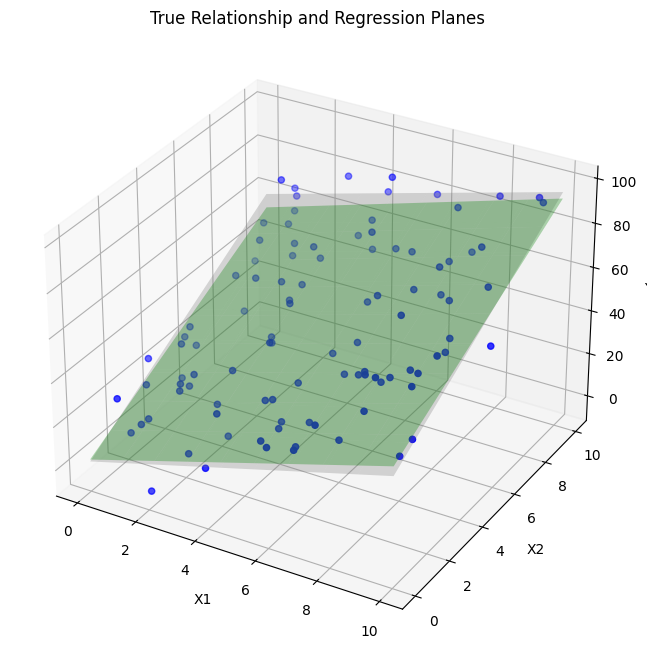

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generate random data
np.random.seed(42)
X1 = np.random.rand(100) * 10
X2 = np.random.rand(100) * 10
Y = 3 + 4 * X1 + 5 * X2 + np.random.randn(100) * 10

# Prepare data for regression
X = np.column_stack((X1, X2))

# Create a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Get the coefficients and intercept
b0 = model.intercept_
b1, b2 = model.coef_

# Create a grid of X1, X2 values
X1_grid, X2_grid = np.meshgrid(np.linspace(0, 10, 10), np.linspace(0, 10, 10))

# Predict Y values for the grid using the regression model
Y_grid_regression = b0 + b1 * X1_grid + b2 * X2_grid

# Predict Y values for the grid using the true relationship
Y_grid_true = 3 + 4 * X1_grid + 5 * X2_grid

# Plot the data points, true plane, and regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
sc = ax.scatter(X1, X2, Y, color='blue', label='Data points')

# Plot the true relationship plane
pl_true = ax.plot_surface(X1_grid, X2_grid, Y_grid_true, alpha=0.3, color='green', label='True Plane')

# Plot the regression plane
pl_regression = ax.plot_surface(X1_grid, X2_grid, Y_grid_regression, alpha=0.3, color='gray', label='Regression Plane')


# Labels and title for the combined plot
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('True Relationship and Regression Planes')

# Add a legend
plt.show()


### Interpretating the Coefficient:



- Ideal Scenario is when there is no correlation betweem predictors:
a unit change in $X_i$ is associated with a $\beta_i$ change in y


- Correlation among predictors makes the interpretation hard. That means the predictors may change together; so a unit change in $X_i$ might change some other predictors which makes it difficualy to interpret the change in y in terms of coefficients. One solution to this is to remove correlated predictors or write them in terms one if possible.


__Example:__

1. The regression coefficients for predicting product sales based on TV, radio, and newspaper advertising.


| Coefficient | Estimate | Std. Error | p-Value |
|-------------|----------|------------|---------|
| Intercept    | 2.939    | 0.3119     | <0.0001 |
| TV           | 0.046    | 0.0014     | <0.0001 |
| Radio        | 0.189    | 0.0086     | <0.0001 |
| Newspaper    | -0.001   | 0.0059     | 0.8599  |



- **Radio**: An extra $1,000 on radio increases sales by about 189 units, with TV and newspaper budgets constant.
- **TV and Radio**: Coefficients are similar to those from simple regressions.
- **Newspaper**: Its coefficient is near zero and not significant (p-value ≈ 0.86), indicating it doesn't affect sales when TV and radio are controlled.


2. Correlation matrix for TV, radio, newspaper, and sales

|             | TV     | Radio  | Newspaper | Sales  |
|-------------|--------|--------|-----------|--------|
| TV          | 1.0000 | 0.0548 | 0.0567    | 0.7822 |
| Radio       | 0.0548 | 1.0000 |           |        |
| Newspaper   | 0.0567 |        | 1.0000    |        |
| Sales        | 0.7822 |        |           |        |




**Why the difference?** The correlation matrix shows a 0.35 correlation between radio and newspaper advertising. This suggests markets with high newspaper spending also spend more on radio. Thus, newspaper's apparent effect on sales in simple regression is actually due to its correlation with radio, not a direct impact.
